In [1]:
import json
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

with open('deps_results2.json') as f:
    data = json.load(f)

## Select just the succesful instances

In [2]:
def is_successful(item): 
        return 'Successful' in item[1] 

successes = [item for item in data.items() if is_successful(item)]

We have a total of

In [3]:
print("%i successes out of %i" % (len(successes), len(data)))

8211 successes out of 43738


## Create a data frame with the successful instances

In [4]:
frame = pd.DataFrame({'Key':s[0], 'Path':s[1]['Successful']} for s in successes)

## Analize path lengths

In [5]:
frame['PathLength'] = frame.Path.apply(lambda ps: min(len(p) for p in ps))

frame.PathLength.value_counts()

1     2501
2     2261
3     1560
4      901
5      487
6      242
7      141
8       55
9       26
10      18
11       7
13       5
12       4
15       2
14       1
Name: PathLength, dtype: int64

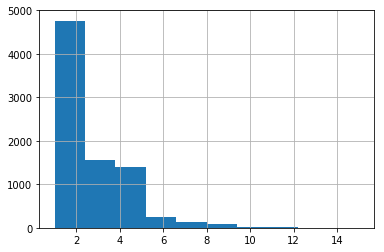

In [6]:
frame.PathLength.hist()
plt.show()

## Analize number required of documents 

In [7]:
def num_documents(paths):
    def helper(l, r, total):
        cum = l | r
        if len(l & r) > 0:
            return (cum, total)
        else:
            return (cum, total + 1)
        
    totals = list()
        
    for path in paths:
        doc_sets = [{a['Doc'] for a in edge['Attributions']} for edge in path]
        if len(doc_sets) == 1:
            totals.append(1)
        else:
            sumation = 1
            current = doc_sets[0]
            for n in doc_sets[1:]:
                current, sumation = helper(current, n, sumation)
            totals.append(sumation)
    
    return min(totals)

frame['MinDocs'] = frame.Path.apply(num_documents)

frame.MinDocs.value_counts()

1     3511
2     2845
3     1171
4      438
5      165
6       61
7       17
10       1
9        1
8        1
Name: MinDocs, dtype: int64

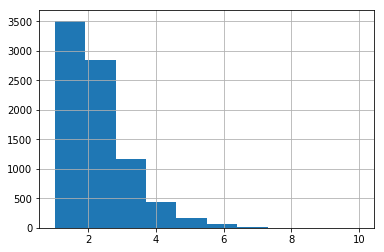

In [8]:

frame.MinDocs.hist()